In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from matplotlib import colormaps 
import ast

In [2]:



df = pd.read_csv('../dataset/final_data/predicted_sentiment.csv')

if 'sentiment' not in df.columns:
    raise ValueError("The dataset must contain a 'sentiment' column.")


def extract_combined_score(sentiment_str):
    try:
        sentiment_dict = ast.literal_eval(sentiment_str) 
        return sentiment_dict.get('Combined_Score', None)  
    except (ValueError, SyntaxError):
        return None  

df['Combined_Score'] = df['sentiment'].apply(extract_combined_score)


print(df[['sentiment', 'Combined_Score']].head())


df['sentiment'] = df['Combined_Score']


df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year
df['Quarter'] = df['date'].dt.to_period('Q')  # Extract quarter


df = df[df['Year'] >= 2009]


gender_mapping = {'male': 0, 'female': 1}
df['Gender_numeric'] = df['gender'].map(gender_mapping)


df_aggregated = df.groupby(['Quarter', 'gender'], as_index=False)['sentiment'].mean()


df_aggregated['Gender_numeric'] = df_aggregated['gender'].map(gender_mapping)


df_aggregated_Yearly = df.groupby(['Year', 'gender'], as_index=False)['sentiment'].mean()


df_aggregated_Yearly['Gender_numeric'] = df_aggregated['gender'].map(gender_mapping)


min_sentiment = df_aggregated['sentiment'].min()
max_sentiment = df_aggregated['sentiment'].max()
df_aggregated['Sentiment_normalized'] = (df_aggregated['sentiment'] - min_sentiment) / (max_sentiment - min_sentiment)
df_aggregated_Yearly['Sentiment_normalized'] = (df_aggregated['sentiment'] - min_sentiment) / (max_sentiment - min_sentiment)


print(df_aggregated.head())

                                           sentiment  Combined_Score
0  {'VADER': 0.0, 'TextBlob': 0.0, 'Flair_LSTM': ...        0.272269
1  {'VADER': -0.6486, 'TextBlob': 0.0, 'Flair_LST...       -0.376774
2  {'VADER': -0.5994, 'TextBlob': 0.0, 'Flair_LST...       -0.002961
3  {'VADER': 0.0, 'TextBlob': -0.1666666666666666...        0.217953
4  {'VADER': 0.0, 'TextBlob': 0.0, 'Flair_LSTM': ...        0.253938
  Quarter  gender  sentiment  Gender_numeric  Sentiment_normalized
0  2009Q1    male  -0.051680               0              0.076789
1  2009Q2    male   0.047624               0              0.416373
2  2009Q3  female   0.182713               1              0.878326
3  2009Q3    male  -0.064787               0              0.031968
4  2009Q4  female   0.116622               1              0.652318


C:\Users\alexa\AppData\Local\Temp\ipykernel_18408\3862283826.py:27: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Quarter'] = df['date'].dt.to_period('Q')  # Extract quarter


In [ ]:
# Calculate rolling average for 2 quarters
df_aggregated['Rolling_Avg_2Q'] = (
    df_aggregated.groupby('gender')['Sentiment_normalized']
    .transform(lambda x: x.rolling(window=2, min_periods=1).mean())
)


print(df_aggregated.head())

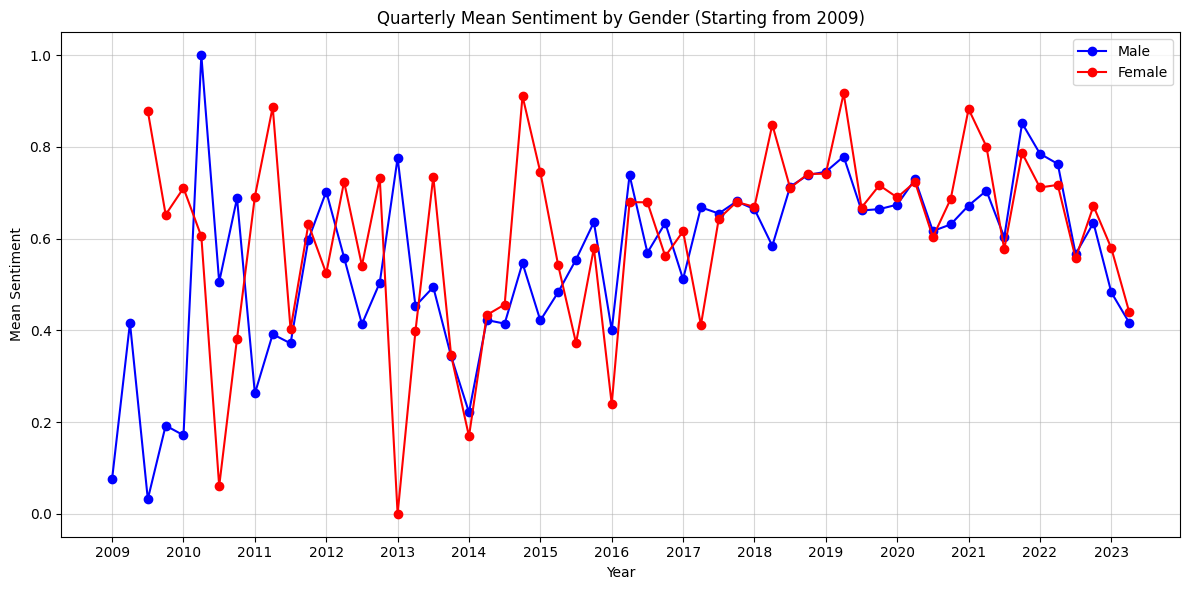

In [3]:
pivot_df = df_aggregated.pivot(index='Quarter', columns='gender', values='Rolling_Avg_2Q')


pivot_df.index = pivot_df.index.astype(str)
pivot_df['Year'] = pivot_df.index.str[:4]  


plt.figure(figsize=(12, 6))
plt.plot(pivot_df.index, pivot_df['male'], label='Male (2Q Rolling Avg)', color='blue', marker='o')
plt.plot(pivot_df.index, pivot_df['female'], label='Female (2Q Rolling Avg)', color='pink', marker='o')


ticks = range(0, len(pivot_df.index), 4) 
plt.xticks(ticks=ticks, labels=pivot_df['Year'].iloc[ticks])  


plt.xlabel('Year')
plt.ylabel('Rolling Average Sentiment (2Q)')
plt.title('Quarterly Rolling Average Sentiment (2Q) by Gender')
plt.legend()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

In [6]:

dfMaster = pd.read_csv('../dataset/expertData/TheClimateChangeTwitterDataset.csv')

if 'sentiment' not in dfMaster.columns:
    raise ValueError("The dataset must contain a 'sentiment' column.")


dfMaster['created_at'] = pd.to_datetime(dfMaster['created_at'], errors='coerce')
dfMaster['Year'] = dfMaster['created_at'].dt.year
dfMaster['Quarter'] = dfMaster['created_at'].dt.to_period('Q')  


dfMaster = dfMaster[dfMaster['Year'] >= 2009]


gender_mapping = {'male': 0, 'female': 1}
dfMaster['Gender_numeric'] = dfMaster['gender'].map(gender_mapping)


dfMaster_aggregated = dfMaster.groupby(['Quarter', 'gender'], as_index=False)['sentiment'].mean()


dfMaster_aggregated['Gender_numeric'] = dfMaster_aggregated['gender'].map(gender_mapping)

dfMaster_aggregated_Yearly = dfMaster.groupby(['Year', 'gender'], as_index=False)['sentiment'].mean()


dfMaster_aggregated_Yearly['Gender_numeric'] = dfMaster_aggregated['gender'].map(gender_mapping)


min_sentiment = dfMaster_aggregated['sentiment'].min()
max_sentiment = dfMaster_aggregated['sentiment'].max()
dfMaster_aggregated['Sentiment_normalized'] = (dfMaster_aggregated['sentiment'] - min_sentiment) / (max_sentiment - min_sentiment)
dfMaster_aggregated_Yearly['Sentiment_normalized'] = (dfMaster_aggregated['sentiment'] - min_sentiment) / (max_sentiment - min_sentiment)


print(dfMaster_aggregated.head())

C:\Users\alexa\AppData\Local\Temp\ipykernel_18408\4153205511.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dfMaster['Quarter'] = dfMaster['created_at'].dt.to_period('Q')  # Extract quarter


  Quarter     gender  sentiment  Gender_numeric  Sentiment_normalized
0  2009Q1     female  -0.023803             1.0              0.575780
1  2009Q1       male  -0.047835             0.0              0.546356
2  2009Q1  undefined  -0.075984             NaN              0.511889
3  2009Q2     female  -0.018442             1.0              0.582345
4  2009Q2       male  -0.028087             0.0              0.570535


In [ ]:

pivot_dfMaster = dfMaster_aggregated.pivot(index='Quarter', columns='gender', values='Sentiment_normalized')


pivot_dfMaster.index = pivot_dfMaster.index.astype(str)


pivot_dfMaster['Year'] = pivot_dfMaster.index.str[:4]  


plt.figure(figsize=(12, 6))
plt.plot(pivot_dfMaster.index.astype(str), pivot_dfMaster['male'], label='Male', marker='o', color='blue')
plt.plot(pivot_dfMaster.index.astype(str), pivot_dfMaster['female'], label='Female', marker='o', color='red')


ticks = range(0, len(pivot_dfMaster.index), 4) 
labels = pivot_dfMaster['Year'].iloc[ticks]    
plt.xticks(ticks=ticks, labels=labels)   


plt.xlabel('Year')
plt.ylabel('Mean Sentiment')
plt.title('Quarterly Mean Sentiment by Gender (Starting from 2009)')


plt.legend()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()